In [ ]:
!pip install --upgrade tensorflow keras


In [ ]:
# Google Colab setup
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()




In [ ]:
# Resize images to 64x64 (VGG16 typically uses 224x224, but keeping it at 64x64 for consistency)
from tensorflow.image import resize

x_train = np.array([resize(img, (64, 64)).numpy() for img in x_train])
x_test = np.array([resize(img, (64, 64)).numpy() for img in x_test])


In [ ]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Convert labels to categorical format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



In [ ]:
# Print dataset shape
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")


Training data shape: (50000, 64, 64, 3), Training labels shape: (50000, 10)
Test data shape: (10000, 64, 64, 3), Test labels shape: (10000, 10)


In [ ]:
# Load VGG16 model (pretrained on ImageNet) without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


In [ ]:
# Unfreeze last few layers for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True


In [ ]:
# Add custom classification layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)


In [ ]:
# Create new model
model = Model(inputs=base_model.input, outputs=x)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
              loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Display model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         262,6

 Total params: 15,111,242 (57.64 MB)

 Trainable params: 15,111,242 (57.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

datagen.fit(x_train)


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=40)


Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 84ms/step - accuracy: 0.1393 - loss: 2.3715 - val_accuracy: 0.4584 - val_loss: 1.5833
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.3632 - loss: 1.7437 - val_accuracy: 0.6285 - val_loss: 1.0607
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.5355 - loss: 1.3183 - val_accuracy: 0.7224 - val_loss: 0.7928
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.6225 - loss: 1.1001 - val_accuracy: 0.7566 - val_loss: 0.7063
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.6728 - loss: 0.9603 - val_accuracy: 0.7795 - val_loss: 0.6521
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 77ms/step - accuracy: 0.7125 - loss: 0.8606 - val_accuracy: 0.7864 - val_loss: 0.6349
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.7362 - loss: 0.8004 - val_accuracy: 0.8073 - val_loss: 0.5469
Epoch 8/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.7570 - loss: 0.7389 - 

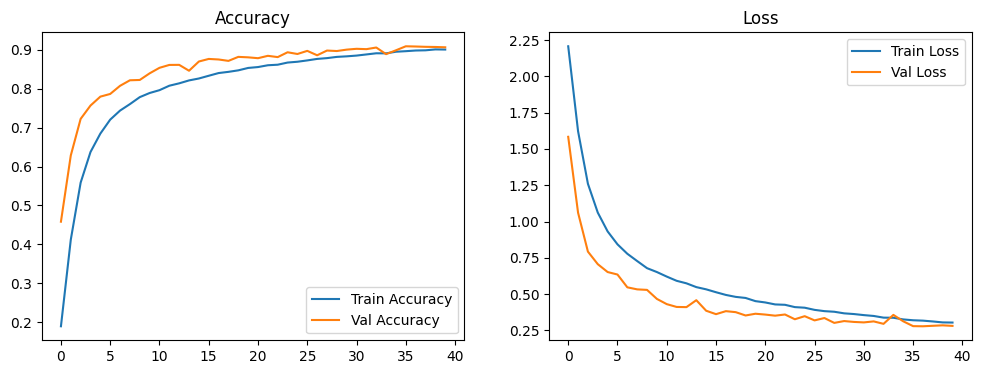

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()